In [1]:
import numpy as np

In [2]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

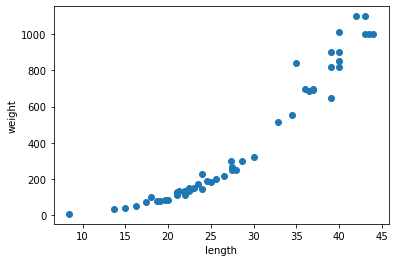

In [3]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [5]:
test_array = np.array([1, 2, 3, 4])
print(test_array.shape)

(4,)


In [6]:
test_array = test_array.reshape(2, 2)
print(test_array.shape)

(2, 2)


In [7]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [8]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

# Train KNeighborsRegressor model
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [9]:
print(knr.score(test_input, test_target))

0.992809406101064


In [10]:
from sklearn.metrics import mean_absolute_error

# Create prediction for the test set
test_prediction = knr.predict(test_input)

# Calculate mean absolute value error for the test set
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


In [11]:
print(knr.score(train_input, train_target))

0.9698823289099254


In [12]:
# Set the number of neighbors as 3
knr.n_neighbors = 3

# Train the model again
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [13]:
print(knr.score(test_input, test_target))

0.9746459963987609


In [14]:
knr = KNeighborsRegressor(n_neighbors=3)

knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [15]:
print(knr.predict([[50]]))

[1033.33333333]


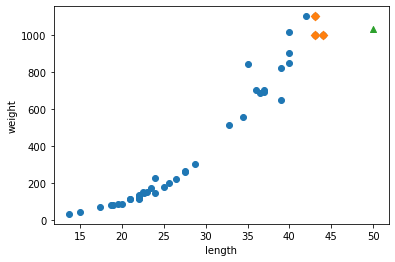

In [16]:
# Get neighbor of a perch which lenth is 50cm
distances, indexes = knr.kneighbors([[50]])
plt.scatter(train_input, train_target)

# Scatter for the neighbor sample
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 50cm perch data
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [17]:
print(np.mean(train_target[indexes]))

1033.3333333333333


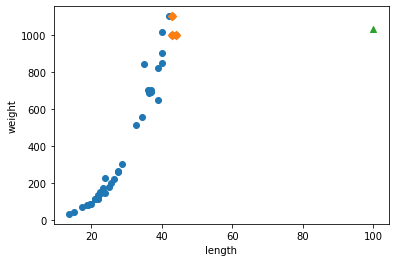

In [18]:
# Get neighbor of a perch which lenth is 100cm
distances, indexes = knr.kneighbors([[100]])
plt.scatter(train_input, train_target)

# Scatter for the neighbor sample
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 50cm perch data
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [19]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Train Linear Regression model
lr.fit(train_input, train_target)

# Predict 50cm perch
print(lr.predict([[50]]))

[1241.83860323]


In [20]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


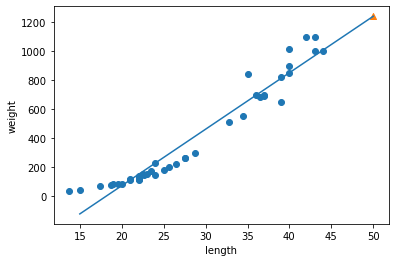

In [21]:
# Scatter for the train set
plt.scatter(train_input, train_target)

# Plot for a linear equation from 15 to 50
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

# 50cm perch data
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [22]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


In [23]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [24]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [25]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [26]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827831


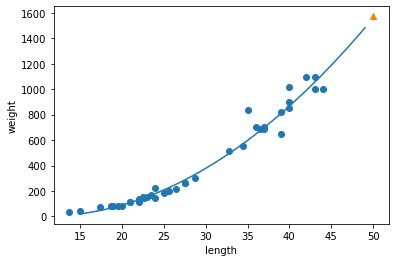

In [27]:
# Create an integer array from 15 to 49 to draw a straight line by interval
point = np.arange(15, 50)

# Scatter for the train set
plt.scatter(train_input, train_target)

# Graph for quadratic equations from 15 to 49
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

# 50cm perch data
plt.scatter(50, 1574, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [28]:
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [29]:
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

In [30]:
from sklearn.preprocessing import PolynomialFeatures

In [31]:
poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


In [32]:
poly = PolynomialFeatures(include_bias = False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [33]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [34]:
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [35]:
test_poly = poly.transform(test_input)

In [36]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982124


In [37]:
print(lr.score(test_poly, test_target))

0.9714559911594202


In [38]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [39]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.999999999997514


In [40]:
print(lr.score(test_poly, test_target))

-144.4019658575197


In [41]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [42]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [43]:
print(ridge.score(test_scaled, test_target))

0.9790693977615383


In [44]:
train_score = []
test_score = []

In [45]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # Create a ridge model
    ridge = Ridge(alpha=alpha)
    # Train the ridge model
    ridge.fit(train_scaled, train_target)
    # Save train score and test score
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

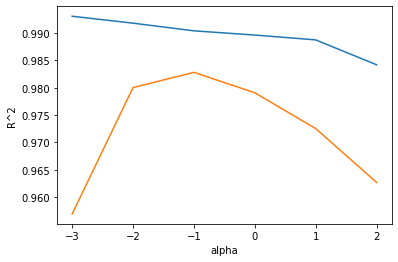

In [46]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [47]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570369
0.9827976465387016


In [48]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [49]:
print(lasso.score(test_scaled, test_target))

0.9800593698421886


In [50]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # Create a lasso model
    lasso = Lasso(alpha=alpha, max_iter = 10000)
    # Train the lasso model
    lasso.fit(train_scaled, train_target)
    # Save train score and test score
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

D:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18778.69795779601, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12972.821345409666, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(


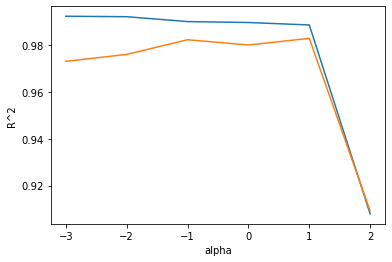

In [51]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [52]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [53]:
print(np.sum(lasso.coef_ == 0))

40
